<a href="https://colab.research.google.com/github/ccemozclk/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction --->

## Import Libraries -->

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math as mt

import scipy.stats as ss
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score, roc_curve

from sklearn.neighbors import LocalOutlierFactor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',2000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Import Dataset -->

In [2]:
house_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Examples/House Price Prediction/house_test.csv")
house_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Examples/House Price Prediction/house_train.csv")
data = pd.concat([house_test, house_train], axis = 0)

In [3]:
df = data.copy()

## Descriptive Statics(Veri Setine Ait Betimsel İstatistikler):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [5]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,nan
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,nan
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,nan
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,nan
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,nan


In [6]:
df.drop(columns = ['Id'], inplace = True)

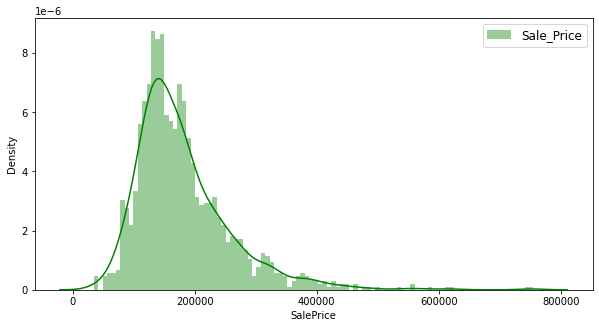

In [7]:
plt.subplots(figsize = (10, 5))
sns.distplot(df["SalePrice"].dropna(), kde = True, label = "Sale_Price", color = 'green', bins = 100)
plt.legend(prop = {'size': 12})
plt.show()

## Data Manipulation :

### Explore - Interact the Missing Values :

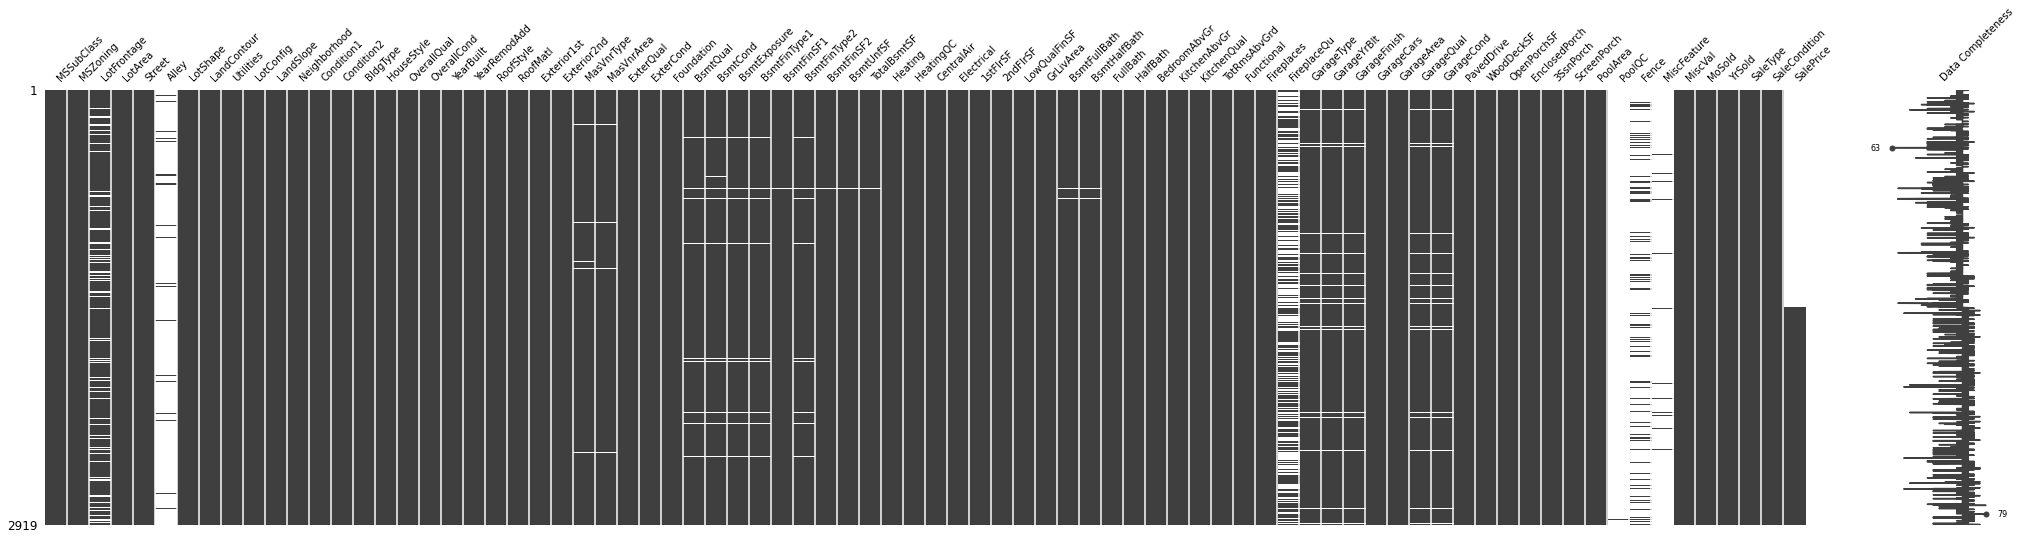

In [8]:
msno.matrix(df, figsize=(35,8), fontsize=10, labels=8)
plt.show()

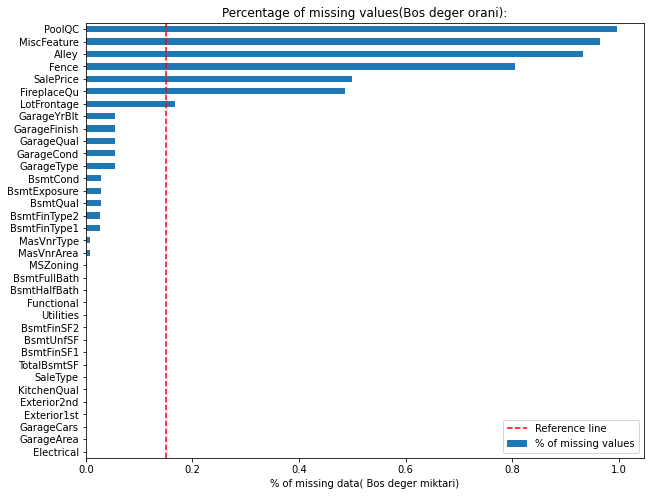

In [9]:
plt.figure(figsize = (10,8))
(df.loc[:, df.isnull().any()].isna().sum() / df.shape[0]).sort_values().plot(kind = 'barh', label = '% of missing values')
plt.axvline(x = 0.15, color = 'r', linestyle = '--', label = 'Reference line')
plt.legend()
plt.title('Percentage of missing values(Bos deger orani):')
plt.xlabel('% of missing data( Bos deger miktari)')
plt.show()

In [10]:
# Manually dropping features which has more then 20% missing vlaues.
# Boş gözlem miktarı toplam gözlem saysının %20'sinden fazla olanları siliyoruz. 

df.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], inplace = True)
columns_missing_less_200 = df[df.select_dtypes(exclude = object).columns].loc[:, df.isnull().sum() < 200].columns

for col in columns_missing_less_200:
   df[col] = df[col].fillna(df[col].median())


df[df.select_dtypes(exclude = object).columns].loc[:, df.isnull().any()].isna().sum()

LotFrontage     486
SalePrice      1459
dtype: int64

In [11]:
data_corr = df.corr().abs().unstack().sort_values(kind = "quicksort", ascending = False).reset_index()
data_corr.loc[data_corr['level_0'] == 'LotFrontage']

,level_0,level_1,0
20,LotFrontage,LotFrontage,1.000
114,LotFrontage,LotArea,0.490
144,LotFrontage,1stFlrSF,0.458
161,LotFrontage,MSSubClass,0.417
190,LotFrontage,GrLivArea,0.382
202,LotFrontage,GarageArea,0.360
210,LotFrontage,TotalBsmtSF,0.355
212,LotFrontage,SalePrice,0.352
213,LotFrontage,TotRmsAbvGrd,0.350
248,LotFrontage,GarageCars,0.310


In [12]:
# Filling missing values by most correlated feature's median
# Burada LotFrontage değişkeni ile en fazla korelasyona sahip olan LotArea 1stFlrSF ve MSSubClass değişkenlerine ait boş değerleri LotFontage değişkeni değerine göre gruplayıp grubun medyanı ile dolduruyoruz.

df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby(['LotArea'])['LotFrontage'].transform('median'))
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby(['1stFlrSF'])['LotFrontage'].transform('median'))
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby(['MSSubClass'])['LotFrontage'].transform('median'))

df[df.select_dtypes(exclude = object).columns].loc[:, df.isnull().any()].isna().sum()

SalePrice    1459
dtype: int64

### Selecting numeric features(Nümerik değere sahip kolonları-değişkenleri seçme) : 

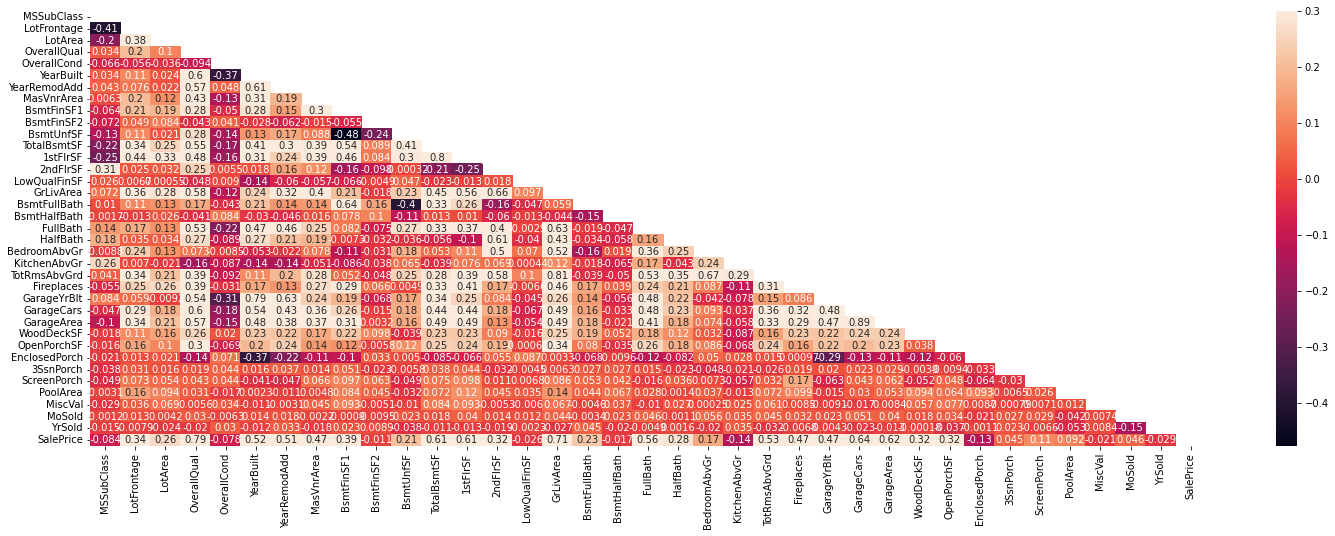

In [13]:
# We visualize the relationships of features with each other. Then we will sort the features from smallest to largest according to their relationship with our target feature "SalePrice".

# Değişkenlerin birbirleri ile ilişkilerini görselleştiriyoruz. Sonrasında değişkenlerin(Feature) hedef değişkenimiz olan "SalePrice"
# Değişkeni ile olan ilişkisine göre küçükten büyüğe göre sıralıycaz.


corrMatrix = df.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(25,8))
sns.heatmap(corrMatrix, mask = mask, vmax = .3, square = False, annot = True)
plt.show()

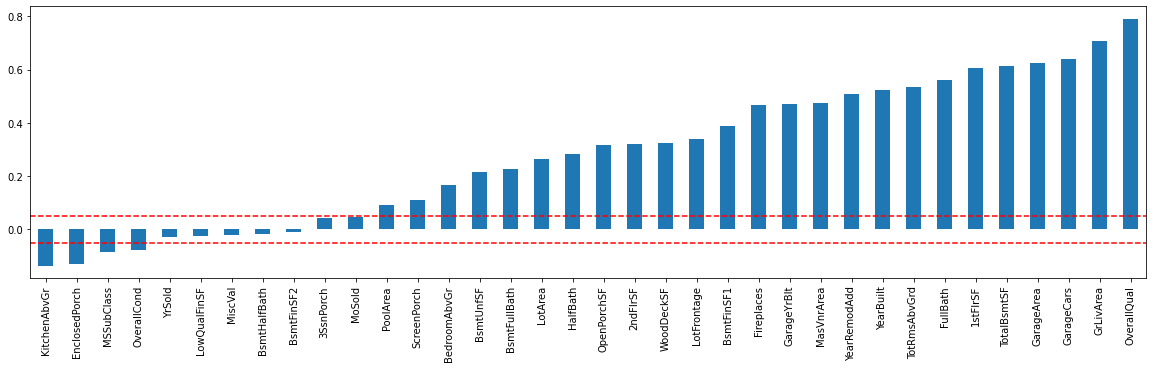

In [14]:
# In the correlation heatmap above, we have SalePrice, our target variable at the bottom of the Y axis. 
#The numeric values in the Sale Price variable row indicate the strength and direction of the relationship of other variables with SalePrice. 
#We sort these values from largest to smallest and compare them according to the limit values. The so-called limit values that we set here are + 0.5 to - 0.5.

# Üstte bulunan korelasyon heatmap'inde Y eksenin en altında bulunan hedef değişkenimiz SalePrice bulunmakta. Sale Price değişkeni satırındaki
# nümerik değerler diğer değişkenlerin SalePrice ile ilişkisinin gücünü ve yönünü göstermekte. Bu değerleri büyükten küçüğe doğru sıralayarak 
# sınır değerlere göre karşılaştırıyoruz. Bizim burada belirlediğimiz sözde sınır değerler + 0.5 ile - 0.5 değerleridir. 

plt.subplots(figsize = (20, 5))
corrMatrix["SalePrice"].drop(["SalePrice"]).sort_values().plot(kind = 'bar')
plt.axhline(y = 0.05, color = 'red', linestyle = '--')
plt.axhline(y = -0.05, color = 'red', linestyle = '--')
plt.show()

In [15]:
# Correlation with output variable
# Hedef değişkenimiz(SalePrice) ile korelasyonu 0.5 değerine eşit ve bu değerden yüksek olan değişkenlerimizi seçiyoruz.
cor_target = abs(corrMatrix["SalePrice"])

#Selecting correlated features
correlated_features = cor_target[cor_target >= 0.05]
print('Amount of total features(Toplam Değişken Sayısı): ', len(df.select_dtypes(include = object).columns))
print('Amount of correlated features (Korelasyon eşiğini geçen değişken sayısı): ', len(correlated_features))

Amount of total features(Toplam Değişken Sayısı):  38
Amount of correlated features (Korelasyon eşiğini geçen değişken sayısı):  30


Now, let's look at the correlation direction and strength of the variables that exceed the correlation threshold value (variables greater than or equal to 0.05) with the target variable, with a pair plot.

Şimdi de korelasyon eşik değerini geçen ( 0.05 değerine eşit veya büyük değişkenler) değişkenlerin hedef değişken ile ilişki yönünü ve gücüne pair plot ile bakalım.

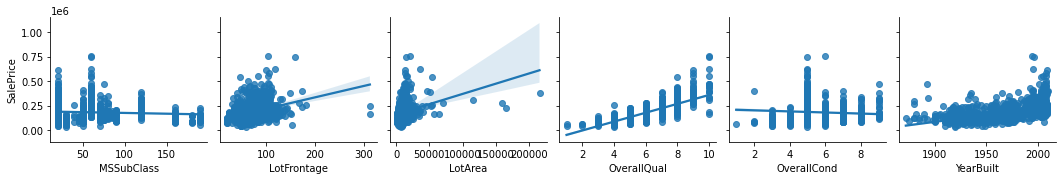

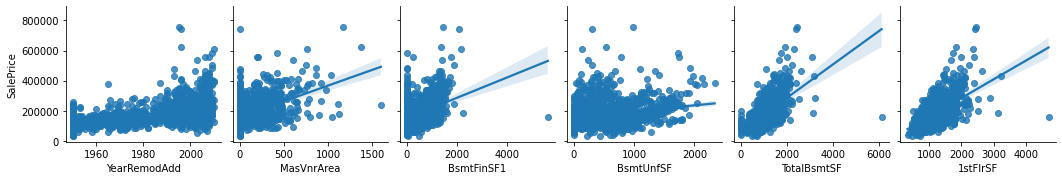

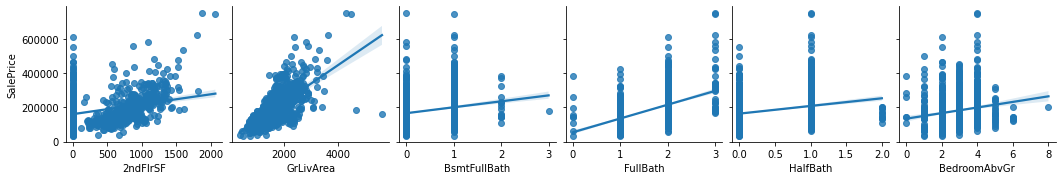

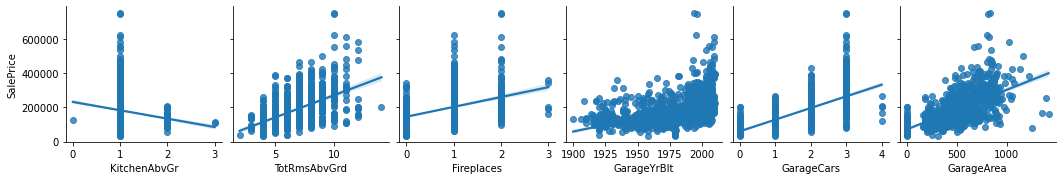

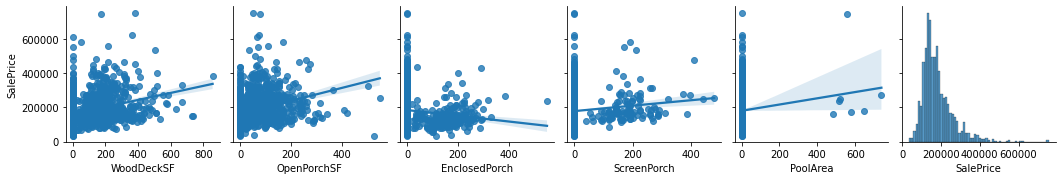

In [16]:
for i in range(0, df[correlated_features.index].shape[1], 6):
    sns.pairplot(data = df[correlated_features.index],
                x_vars =  df[correlated_features.index].columns[i:i+6],
                y_vars = ['SalePrice'], kind='reg')

### Drop to outliers for numerıc varıables( Aykırı değerlerden Kurtulma) : 

In [17]:
df.loc[(df['BsmtFinSF1'] > 4000) & (df["SalePrice"].notnull()), 'BsmtFinSF1'] = None
df.loc[(df['TotalBsmtSF'] > 4000) & (df["SalePrice"].notnull()), 'TotalBsmtSF'] = None
df.loc[(df['GrLivArea'] > 4000) & (df["SalePrice"] < 400000) & (df["SalePrice"].notnull()), 'GrLivArea'] = None
df.loc[(df['1stFlrSF'] > 4000) & (df["SalePrice"].notnull()), '1stFlrSF'] = None
df.loc[(df['LotFrontage'] > 200) & (df["SalePrice"].notnull()), 'LotFrontage'] = None
df.loc[(df['LotArea'] > 60000) & (df["SalePrice"].notnull()), 'LotArea'] = None
df.loc[(df['GarageArea'] > 1200) & (df["SalePrice"] < 400000) & (df["SalePrice"].notnull()), 'GarageArea'] = None

Outlier sorununu çözdükten sonra pairplot yeniden kullanılır ve korelasyon fonksiyonu sonucu elde ettiğimiz değişkenlerin Target Feature ile ilişkisini pairplot ile görselleştirelim.

After the Outlier problem, pairplot is used again and visualize the relationship between the variables we obtained as a result of the correlation function and the Target Feature with pairplot.


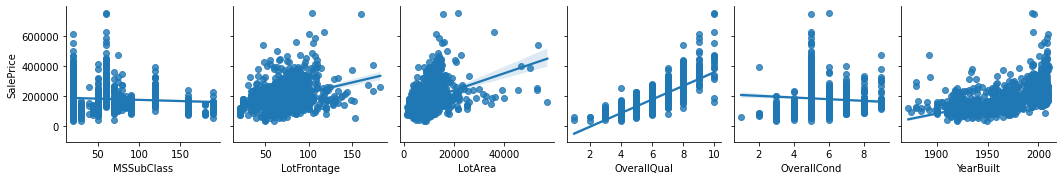

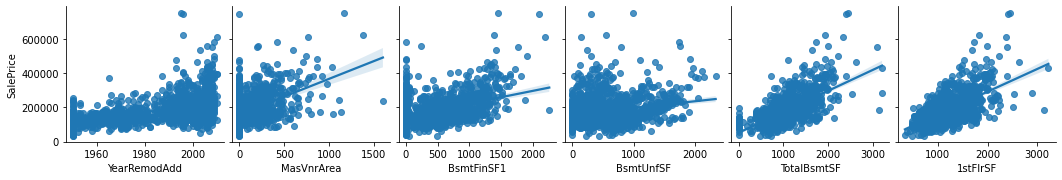

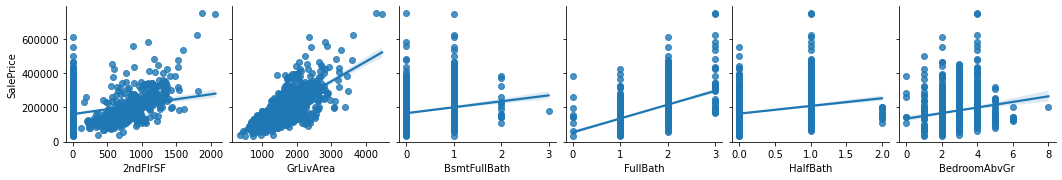

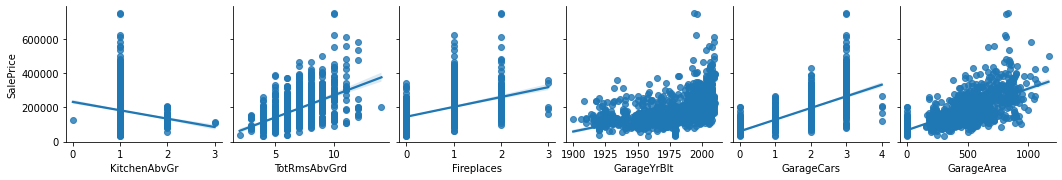

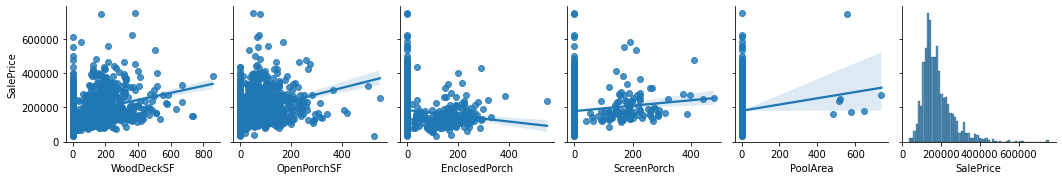

In [18]:
for i in range(0, df[correlated_features.index].shape[1], 6):
    sns.pairplot(data = df[correlated_features.index],
                x_vars =  df[correlated_features.index].columns[i:i+6],
                y_vars = ['SalePrice'], kind='reg')

### Selecting Categorical Features ( Kategorik değişkenlerin seçimi) :

In [19]:
# Check for any missing values in categorical features3
# İlk olarak veri setimizde bulunna kategorik değişkenlerde eksik değer olup-olmadığını kontrol edelim.
df[df.select_dtypes(include = object).columns].loc[:, df.isnull().any()].isna().sum()

MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
Electrical        1
KitchenQual       1
Functional        2
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

In [20]:
# # We fill in the missing values in the categorical features with the mode of the series.
# Sonrasında kategorik değişkenlerdeki eksik gözlemleri serilerin modu ile dolduruyoruz.  

for col in df.select_dtypes(include = object).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df[df.select_dtypes(include = object).columns].loc[:, df.isnull().any()].isna().sum()

Series([], dtype: float64)

As you can see, we have solve the missing values issues in the categorical variables.

Görüldüğü gibi kategorik değişkenlerdeki eksik değerlerden de kurtulmuş olduk.

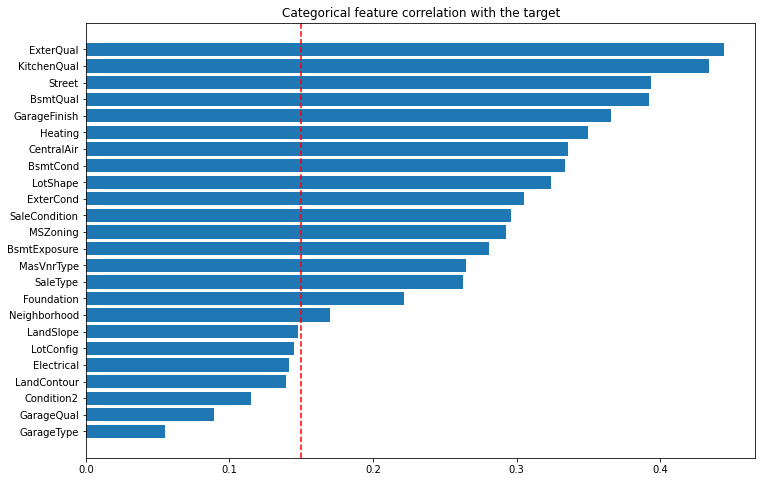

In [21]:
#Şimdi, kategorik değişkenler ile hedef değişken olan SalePrice değişkeni arasındaki korelasyon düzeyini yukarıda Ratio of Missing Values chart ında görselleştirdiğimiz gibi görselleştirelim
#Visualize the correlation level between the categorical variables and the target variable SalePrice, as we visualized in the Ratio of Missing Values ​​chart above.

def cramers_v(confusion_matrix):
    "calculate Cramers V statistic for categorial-categorial association"
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
#Burada TP FP TN FN değerleri görmüş olduğumuz confusion matrix'in satır ve sutunlarını r ve k değerlerine atıyoruz. 
#Atama Sonrasında ise r ve k değerlerini ki-kare formulune alıyoruz ve sonrasında korelasyon derecesını ıncelıyoruz.


cramers_values = []
obj_columns = df.select_dtypes(include = object).columns

for column in obj_columns:
    confusion_matrix = pd.crosstab(df[column], df["SalePrice"])
    cramers_values.append(cramers_v(confusion_matrix.values))


cramers_values_df = pd.DataFrame()
cramers_values_df['feature'], cramers_values_df['value'] = obj_columns, cramers_values



plt.subplots(figsize = (12, 8))
plt.barh(cramers_values_df[cramers_values_df['value'] > 0].sort_values(['value'])['feature'],cramers_values_df[cramers_values_df['value'] > 0].sort_values(['value'])['value'])    
plt.axvline(x = 0.15, color = 'red', linestyle = '--', label = 'Reference line')
plt.title("Categorical feature correlation with the target")
plt.show()

cramers_values_df = cramers_values_df[cramers_values_df['value'] > 0.15]['feature'].to_list() # Select correlated features


In [22]:
len(cramers_values_df)

17

In [23]:
# Sonrasında seçtiğimiz nümerik ve kategorik değişkenleri concat ile sütun olarak birleştiriyoruz. 
df = pd.concat([df[cramers_values_df], df[correlated_features.index]], axis = 1)
df

,MSZoning,Street,LotShape,Neighborhood,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,GarageFinish,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
0,RH,Pave,Reg,NAmes,None,TA,TA,CBlock,TA,TA,No,GasA,Y,TA,Unf,WD,Normal,20,80.000,11622.000,5,6,1961,1961,0.000,468.000,270.000,882.000,896.000,0,896.000,0.000,1,0,2,1,5,0,1961.000,1.000,730.000,140,0,0,120,0,nan
1,RL,Pave,IR1,NAmes,BrkFace,TA,TA,CBlock,TA,TA,No,GasA,Y,Gd,Unf,WD,Normal,20,81.000,14267.000,6,6,1958,1958,108.000,923.000,406.000,1329.000,1329.000,0,1329.000,0.000,1,1,3,1,6,0,1958.000,1.000,312.000,393,36,0,0,0,nan
2,RL,Pave,IR1,Gilbert,None,TA,TA,PConc,Gd,TA,No,GasA,Y,TA,Fin,WD,Normal,60,74.000,13830.000,5,5,1997,1998,0.000,791.000,137.000,928.000,928.000,701,1629.000,0.000,2,1,3,1,6,1,1997.000,2.000,482.000,212,34,0,0,0,nan
3,RL,Pave,IR1,Gilbert,BrkFace,TA,TA,PConc,TA,TA,No,GasA,Y,Gd,Fin,WD,Normal,60,78.000,9978.000,6,6,1998,1998,20.000,602.000,324.000,926.000,926.000,678,1604.000,0.000,2,1,3,1,7,1,1998.000,2.000,470.000,360,36,0,0,0,nan
4,RL,Pave,IR1,StoneBr,None,Gd,TA,PConc,Gd,TA,No,GasA,Y,Gd,RFn,WD,Normal,120,43.000,5005.000,8,5,1992,1992,0.000,263.000,1017.000,1280.000,1280.000,0,1280.000,0.000,2,0,2,1,5,0,1992.000,2.000,506.000,0,82,0,144,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Gilbert,None,TA,TA,PConc,Gd,TA,No,GasA,Y,TA,RFn,WD,Normal,60,62.000,7917.000,6,5,1999,2000,0.000,0.000,953.000,953.000,953.000,694,1647.000,0.000,2,1,3,1,7,1,1999.000,2.000,460.000,0,40,0,0,0,175000.000
1456,RL,Pave,Reg,NWAmes,Stone,TA,TA,CBlock,Gd,TA,No,GasA,Y,TA,Unf,WD,Normal,20,85.000,13175.000,6,6,1978,1988,119.000,790.000,589.000,1542.000,2073.000,0,2073.000,1.000,2,0,3,1,7,2,1978.000,2.000,500.000,349,0,0,0,0,210000.000
1457,RL,Pave,Reg,Crawfor,None,Ex,Gd,Stone,TA,Gd,No,GasA,Y,Gd,RFn,WD,Normal,70,66.000,9042.000,7,9,1941,2006,0.000,275.000,877.000,1152.000,1188.000,1152,2340.000,0.000,2,0,4,1,9,2,1941.000,1.000,252.000,0,60,0,0,0,266500.000
1458,RL,Pave,Reg,NAmes,None,TA,TA,CBlock,TA,TA,Mn,GasA,Y,Gd,Unf,WD,Normal,20,68.000,9717.000,5,6,1950,1996,0.000,49.000,0.000,1078.000,1078.000,0,1078.000,1.000,1,0,2,1,5,0,1950.000,1.000,240.000,366,0,112,0,0,142125.000


## Data pre-processing for Machine Learning Model (Makine Ogrenmesi Modeli icin veri on isleme) :

In [24]:
# Preparing features for analysis
# Burada da ılk olarak dummy_feature ataması yapıyoruz ve kategorik degıskenlerı dummy degısken olarak alıyoruz. 
#Kukla değişken oluşturmak demek, etkisine bakmak istediğimiz grubu 1, diğer grupları 0 a eşitleyerek etkisine bakmak istediğimiz grubun etkisini ölçmek demek. 
#Hangi değişkende hangi grup 1, hangileri 0 olarak kodlandığını rapor ettiğimiz tabloda belirtmemiz gerekir. Böylece okuyucu da hangi kukla değişkenin hangi grubun etkisini ölçmek için kullanıldığını anlayabilir.

# Assigning dummy_feature and take categorical variables as dummy variables.
# Creating a dummy variable means measuring the effect of the group whose effect we want to look at by equating the group we want to look at to 1 and the other groups to 0.
# We need to specify which group is coded as 1 and which is coded as 0 in which variable in the table we report. Thus, the reader can understand which dummy variable is used to measure the effect of which group.

dummy_features = df.select_dtypes(include = object).columns
    
df = pd.concat([df, pd.get_dummies(df[dummy_features], drop_first = True)], axis = 1, sort = False)
df.drop(columns = df[dummy_features], inplace = True)

df.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,60,62.000,7917.000,6,5,1999,2000,0.000,0.000,953.000,953.000,953.000,694,1647.000,0.000,2,1,3,1,7,1,1999.000,2.000,460.000,0,40,0,0,0,175000.000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,20,85.000,13175.000,6,6,1978,1988,119.000,790.000,589.000,1542.000,2073.000,0,2073.000,1.000,2,0,3,1,7,2,1978.000,2.000,500.000,349,0,0,0,0,210000.000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,70,66.000,9042.000,7,9,1941,2006,0.000,275.000,877.000,1152.000,1188.000,1152,2340.000,0.000,2,0,4,1,9,2,1941.000,1.000,252.000,0,60,0,0,0,266500.000,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,20,68.000,9717.000,5,6,1950,1996,0.000,49.000,0.000,1078.000,1078.000,0,1078.000,1.000,1,0,2,1,5,0,1950.000,1.000,240.000,366,0,112,0,0,142125.000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1459,20,75.000,9937.000,5,6,1965,1965,0.000,830.000,136.000,1256.000,1256.000,0,1256.000,1.000,1,1,3,1,6,0,1965.000,1.000,276.000,736,68,0,0,0,147500.000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [25]:
test = df[df["SalePrice"].isnull()].drop(["SalePrice"], axis = 1).copy()
train = df[df["SalePrice"].notnull()].copy()

train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450.000,7,5,2003,2003,196.000,706.000,150.000,856.000,856.000,854,1710.000,1.000,2,1,3,1,8,0,2003.000,2.000,548.000,0,61,0,0,0,208500.000,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.000,9600.000,6,8,1976,1976,0.000,978.000,284.000,1262.000,1262.000,0,1262.000,0.000,2,0,3,1,6,1,1976.000,2.000,460.000,298,0,0,0,0,181500.000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.000,11250.000,7,5,2001,2002,162.000,486.000,434.000,920.000,920.000,866,1786.000,1.000,2,1,3,1,6,1,2001.000,2.000,608.000,0,42,0,0,0,223500.000,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.000,9550.000,7,5,1915,1970,0.000,216.000,540.000,756.000,961.000,756,1717.000,1.000,1,0,3,1,7,1,1998.000,3.000,642.000,0,35,272,0,0,140000.000,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.000,14260.000,8,5,2000,2000,350.000,655.000,490.000,1145.000,1145.000,1053,2198.000,1.000,2,1,4,1,9,1,2000.000,3.000,836.000,192,84,0,0,0,250000.000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
# Drop NaN just to be safe
# Butun ıslemlerden sonra test ve traın olarak atama yaptığımız alt verı setlerımızde boş değerlerı sılebılırız.

train.dropna(inplace = True)
test.dropna(inplace = True)

In [27]:
# Separating target column from other features
y = train["SalePrice"]
x = train.drop(columns = "SalePrice")

# Train and Test dataset split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle = True)
x_train.shape, x_test.shape

((1013, 109), (435, 109))

## Model Selecting (Makine Ogrenmesi Modeli Secme ) : 

In [28]:
gb_model = XGBRegressor()
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)

[06:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [29]:
print("R2 score: " + '%.3f' % r2_score(y_pred, y_test))
print("RMSE score: ", f"{np.sqrt(mean_squared_error(y_pred, y_test)):,.0f}")
print("MAE score: ", f"{mean_absolute_error(y_pred, y_test):,.0f}")

R2 score: 0.888
RMSE score:  23,543
MAE score:  15,139


In [30]:
parameters = {'colsample_bytree':[0.4],
              'eta':[0.1], 
              'max_depth':[3], 
              'n_estimators':[800],
              'reg_alpha':[0.5], 
              'reg_lambda':[0.3],
              'subsample':[0.5],
              }

In [31]:
XGBRegressor_model = GridSearchCV(XGBRegressor(), parameters, refit=True, cv=8, verbose=1)
grid_search = XGBRegressor_model.fit(x_train, y_train)
predict = grid_search.predict(x_test)
eniyiparametreler= grid_search.best_params_
print(eniyiparametreler)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[06:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:54:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:54:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:54:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:54:13] WARNING: /workspace/src/objective/regress

In [32]:
print("R2 score: " + '%.3f' % r2_score(y_test, predict))
print("RMSE score: ", f"{np.sqrt(mean_squared_error(y_test, predict)):,.0f}")
print("MAE score: ", f"{mean_absolute_error(y_test, predict):,.0f}")
print("Best Score: " + '%.3f' % XGBRegressor_model.best_score_)

R2 score: 0.904
RMSE score:  22,521
MAE score:  15,204
Best Score: 0.923


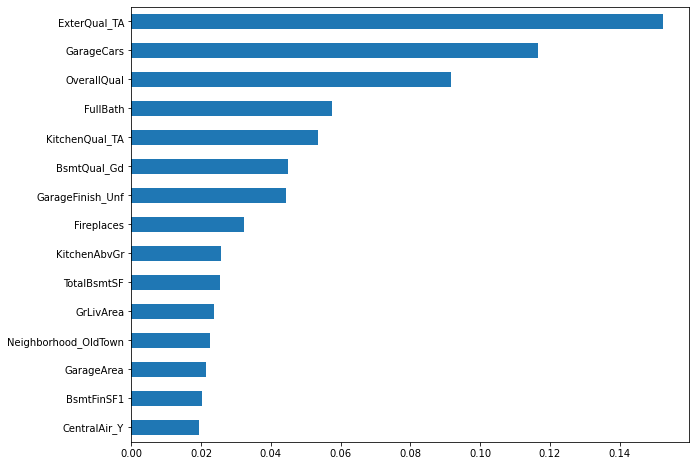

In [33]:
# Plot feature importance
feature_importance = pd.Series(XGBRegressor_model.best_estimator_.feature_importances_, index = x_train.columns)
plt.figure(figsize = (10,8))
feature_importance.nlargest(15).sort_values(ascending = True).plot(kind = 'barh')
plt.show()